In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 12145 files belonging to 11 classes.
Using 9716 files for training.
Found 12145 files belonging to 11 classes.
Using 2429 files for validation.
Epoch 1/30
304/304 [==============================] - 55s 163ms/step - loss: 2.2790 - accuracy: 0.2523 - val_loss: 2.1758 - val_accuracy: 0.2441
Epoch 2/30
304/304 [==============================] - 55s 177ms/step - loss: 1.9597 - accuracy: 0.3435 - val_loss: 2.1861 - val_accuracy: 0.2635
Epoch 3/30
304/304 [==============================] - 51s 166ms/step - loss: 1.8394 - accuracy: 0.3853 - val_loss: 2.1202 - val_accuracy: 0.2795
Epoch 4/30
304/304 [==============================] - 53s 172ms/step - loss: 1.7073 - accuracy: 0.4236 - val_loss: 1.9923 - val_accuracy: 0.3240
Epoch 5/30
304/304 [==============================] - 50s 162ms/step - loss: 1.6071 - accuracy: 0.4578 - val_loss: 2.4047 - val_accuracy: 0.2133
Epoch 6/30
304/304 [==============================] - 53s 173ms/step - loss: 1.5068 - accuracy: 0.4996 - val_loss: 1.9569 - v

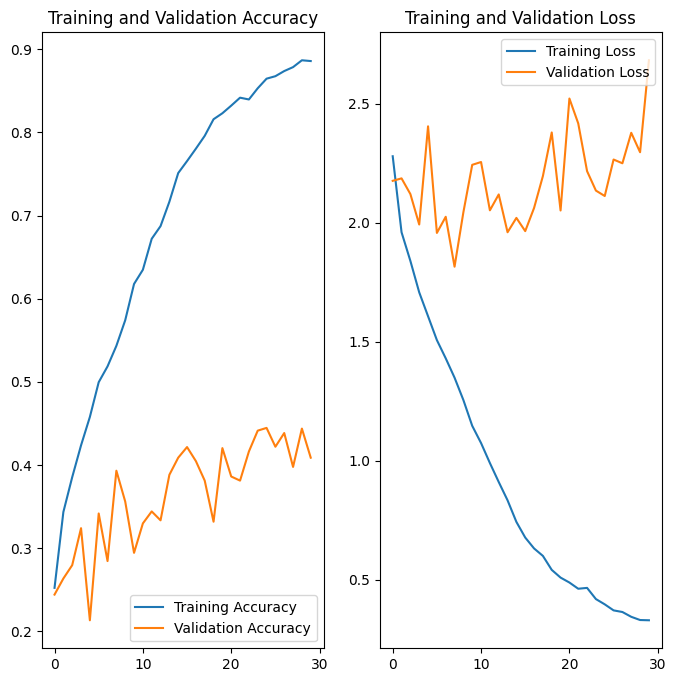

Test accuracy:
0.40881019830703735


In [4]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(5, 5), activation='relu', input_shape=(224,224,3)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=11, activation='softmax'))


# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# add training to here
train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/All_animals_proper/',validation_split=0.2,subset="training",seed=123,image_size=(224, 224),batch_size=32)
val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/All_animals_proper/',validation_split=0.2,subset="validation",seed=123,image_size=(224, 224),batch_size=32)
history = model.fit(train_ds,validation_data=val_ds,epochs=30)

test_loss, test_acc = model.evaluate(val_ds, verbose=2)
# Load the image you want to classify
img = Image.open('./drive/MyDrive/All_animals/bear(10).jpg')
#img.show()

# Preprocess the image
img = img.resize((224, 224))  # Resize the image to the input size of the model
img = np.array(img) / 255.0  # Normalize the pixel values to be between 0 and 1
img = np.expand_dims(img, axis=0)  # Add a batch dimension to the image

# Make a prediction on the image
pred = model.predict(img)

# Get the predicted label
label = np.argmax(pred)

# Print the predicted label and the confidence on each choice make it so that numbers equate to the animals later
print(label)
print(pred)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Test accuracy:")
print(test_acc)